<a href="https://colab.research.google.com/github/suzy-hur/IOD_lab_work/blob/main/K_Means_Lab_6_1_1_170623.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the blood varied with sport body size and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
white blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Details
Do blood hemoglobin concentrations of athletes in endurance-related events differ from those in power-related events?

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [30]:
# IMPORT LIBRARIES
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

import seaborn as sns

### 1. Import the data

In [31]:
csv_file = 'ais.csv'

### 2. Do some EDA of relationships between features.

In [32]:
df = pd.read_csv(csv_file)

In [33]:
df.shape

(202, 14)

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [34]:
df.columns

Index(['Unnamed: 0', 'rcc', 'wcc', 'hc', 'hg', 'ferr', 'bmi', 'ssf', 'pcBfat',
       'lbm', 'ht', 'wt', 'sex', 'sport'],
      dtype='object')

In [35]:
df.describe()

Unnamed: 0         rcc         wcc          hc          hg        ferr  \
count  202.000000  202.000000  202.000000  202.000000  202.000000  202.000000   
mean   101.500000    4.718614    7.108911   43.091584   14.566337   76.876238   
std     58.456537    0.457976    1.800337    3.662989    1.362451   47.501239   
min      1.000000    3.800000    3.300000   35.900000   11.600000    8.000000   
25%     51.250000    4.372500    5.900000   40.600000   13.500000   41.250000   
50%    101.500000    4.755000    6.850000   43.500000   14.700000   65.500000   
75%    151.750000    5.030000    8.275000   45.575000   15.575000   97.000000   
max    202.000000    6.720000   14.300000   59.700000   19.200000  234.000000   

              bmi         ssf      pcBfat         lbm          ht          wt  
count  202.000000  202.000000  202.000000  202.000000  202.000000  202.000000  
mean    22.955891   69.021782   13.507426   64.873713  180.103960   75.007921  
std      2.863933   32.565333    6.189826   13.070197    9.734494   13.925199  
min     16.750000   28.000000    5.630000   34.360000  148.900000   37.800000  
25%     21.082500   43.850000    8.545000   54.667500  174.000000   66.525000  
50%     22.720000   58.600000   11.650000   63.035000  179.700000   74.400000  
75%     24.465000   90.350000   18.080000   74.750000  186.175000   84.125000  
max     34.420000  200.800000   35.520000  106.000000  209.400000  123.200000

In [36]:
df.head()

Unnamed: 0   rcc  wcc    hc    hg  ferr    bmi    ssf  pcBfat    lbm  \
0           1  3.96  7.5  37.5  12.3    60  20.56  109.1   19.75  63.32   
1           2  4.41  8.3  38.2  12.7    68  20.67  102.8   21.30  58.55   
2           3  4.14  5.0  36.4  11.6    21  21.86  104.6   19.88  55.36   
3           4  4.11  5.3  37.3  12.6    69  21.88  126.4   23.66  57.18   
4           5  4.45  6.8  41.5  14.0    29  18.96   80.3   17.64  53.20   

      ht    wt sex   sport  
0  195.9  78.9   f  B_Ball  
1  189.7  74.4   f  B_Ball  
2  177.8  69.1   f  B_Ball  
3  185.0  74.9   f  B_Ball  
4  184.6  64.6   f  B_Ball

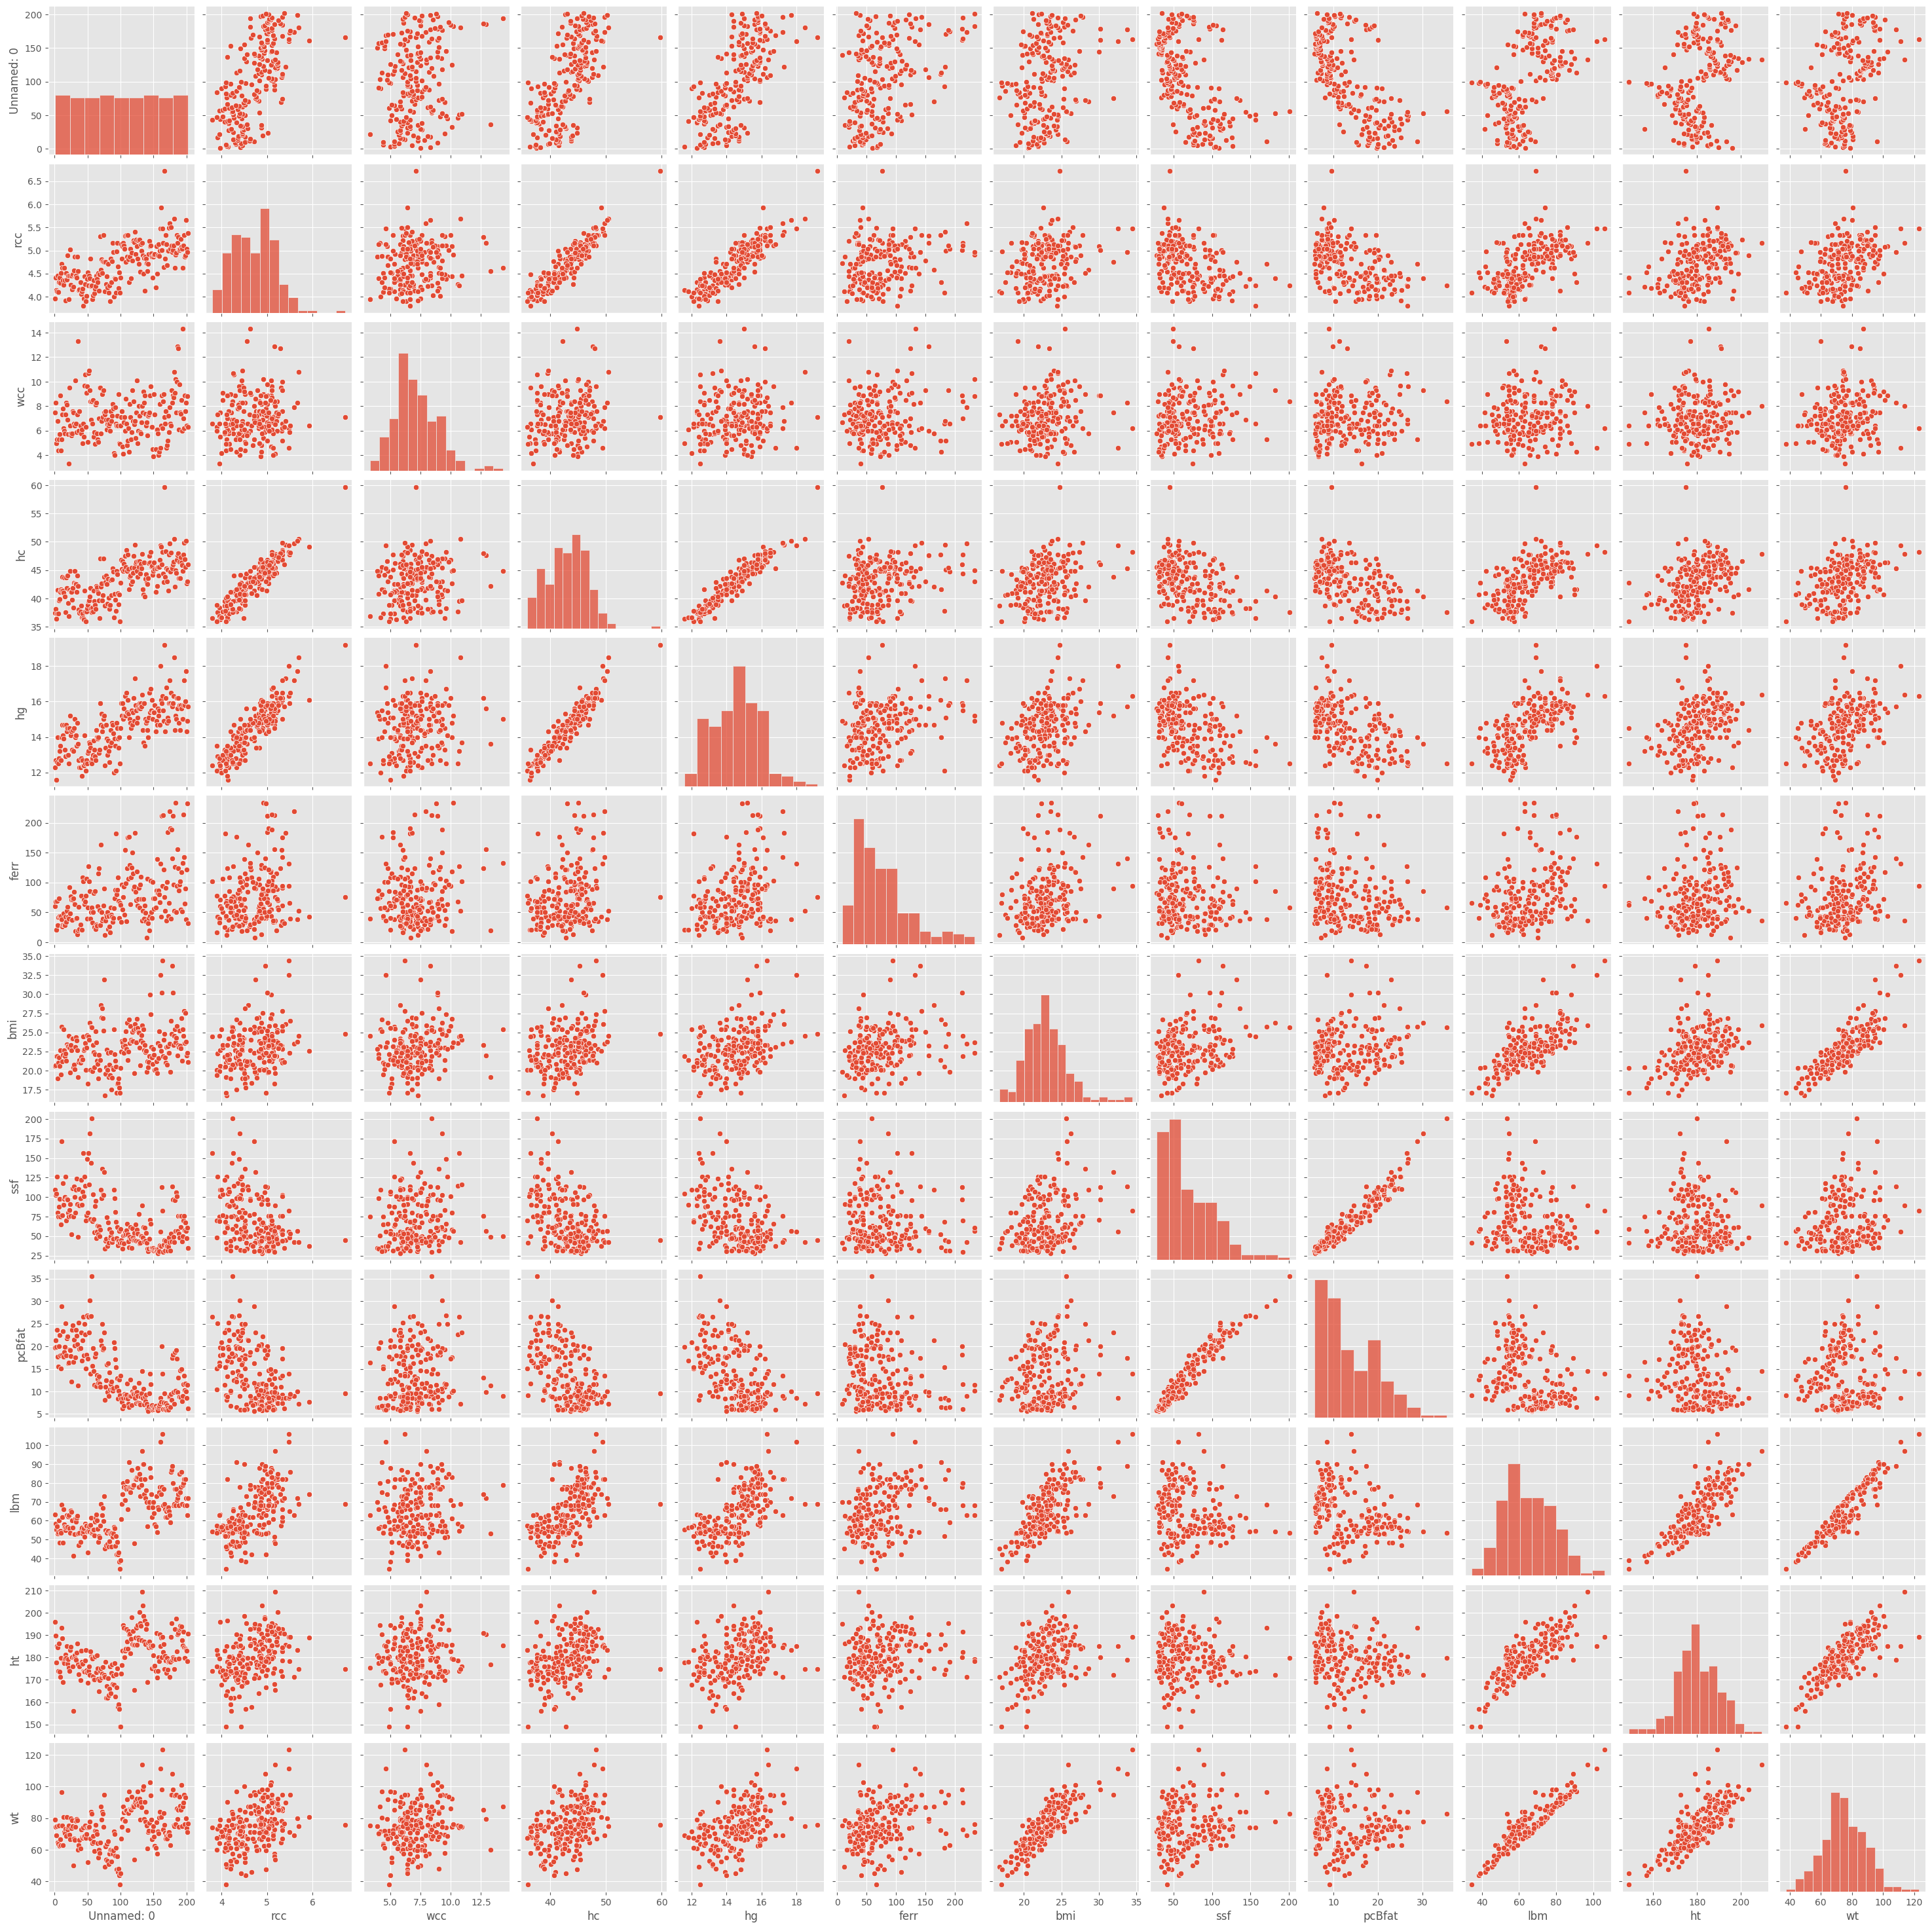

In [37]:
import seaborn as sns

sns.pairplot(df)

In [38]:
df.isnull().sum()

Unnamed: 0    0
rcc           0
wcc           0
hc            0
hg            0
ferr          0
bmi           0
ssf           0
pcBfat        0
lbm           0
ht            0
wt            0
sex           0
sport         0
dtype: int64

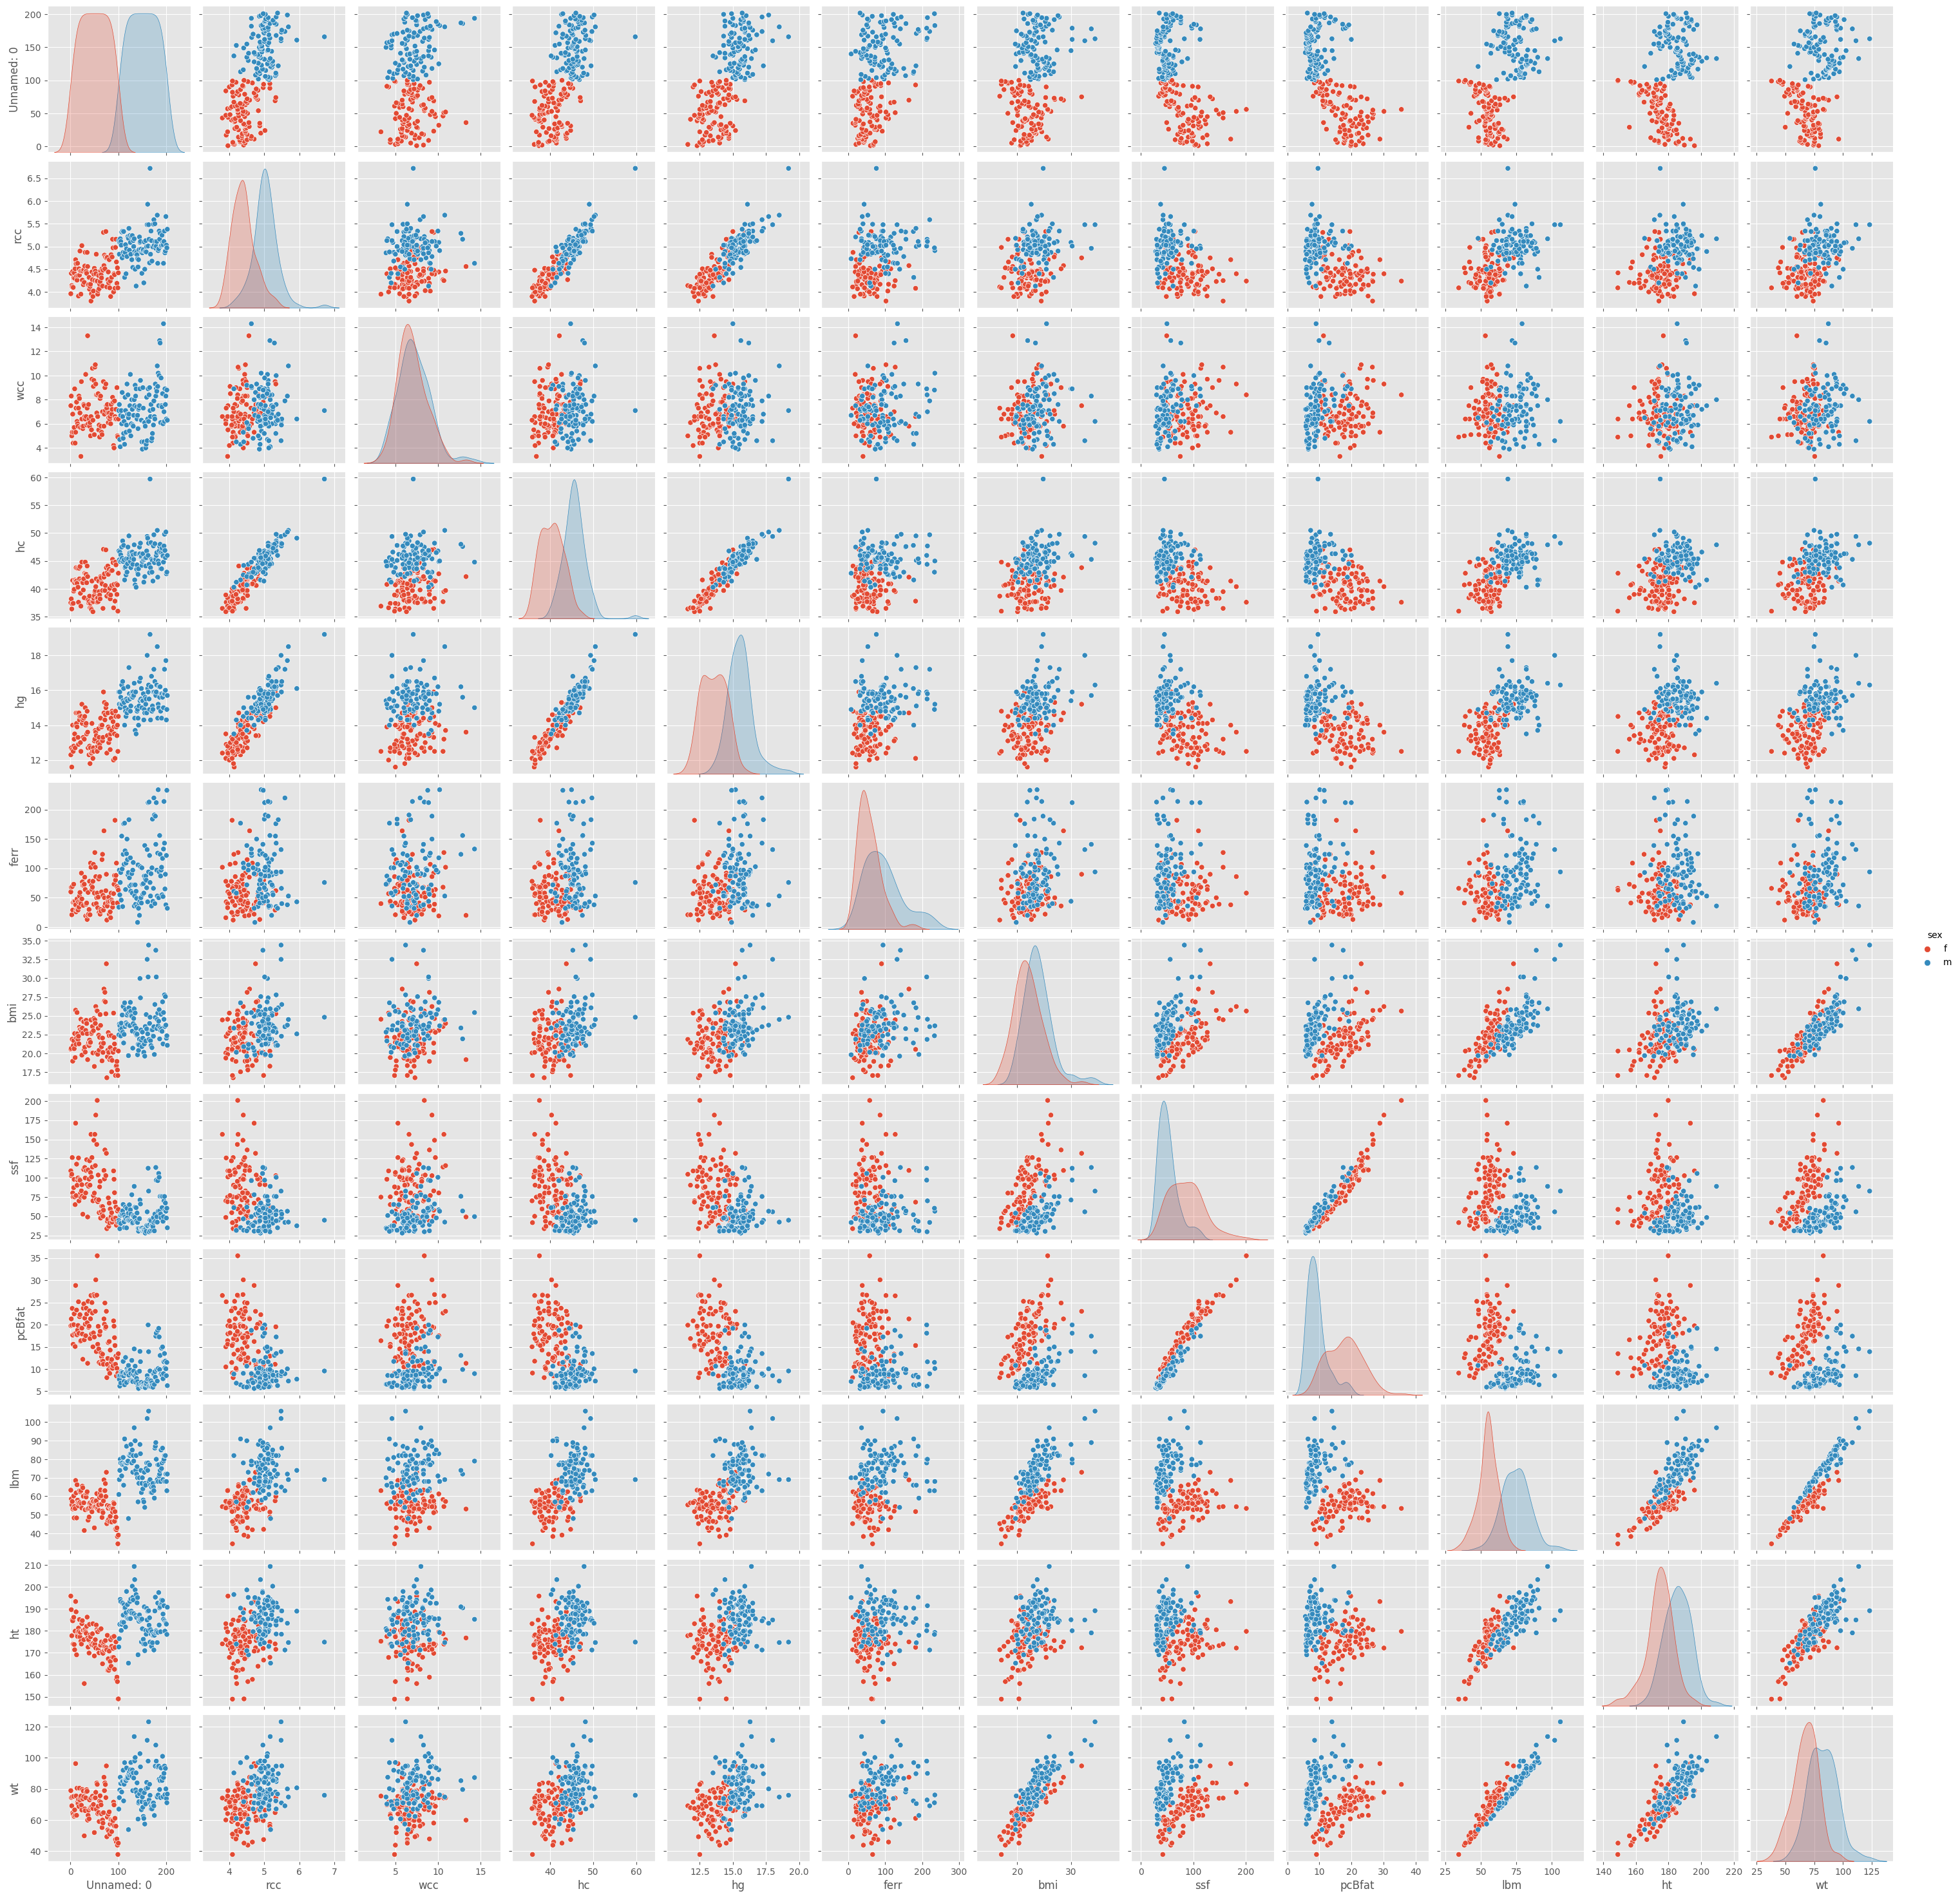

In [39]:
# Look at the real species labels.
sns.pairplot(data=df, hue='sex')
# classea appear to have a similar number of samples.
# Blue consistently looks like the divisor between the green and red classes.

In [40]:
df['sex'].value_counts()

m    102
f    100
Name: sex, dtype: int64

In [42]:
# drop 'species', which is currently acting as a target (categorical)
X = df.drop(['sex', 'sport'], axis = 1)
# X = ais[['ht', 'wt']]
# y = seeds.sex

In [43]:
# ANSWER
from sklearn.preprocessing import StandardScaler

# Select the features for scaling
features = ['rcc', 'wcc', 'hc', 'hg', 'ferr', 'bmi', 'ssf', 'pcBfat', 'lbm', 'ht', 'wt']

# Create a scaler object
scaler = StandardScaler()

# Apply standardization to the selected features
df_scaled = scaler.fit_transform(df[features])

# Create a new dataframe with the scaled features
df_scaled = pd.DataFrame(df_scaled, columns=features)

# Check the scaled dataframe
print(df_scaled.head())


        rcc       wcc        hc        hg      ferr       bmi       ssf  \
0 -1.660563  0.217771 -1.530301 -1.667558 -0.356163 -0.838652  1.233760   
1 -0.675538  0.663236 -1.338725 -1.373240 -0.187328 -0.800148  1.039822   
2 -1.266553 -1.174308 -1.831348 -2.182615 -1.179234 -0.383603  1.095232   
3 -1.332221 -1.007259 -1.585037 -1.446820 -0.166223 -0.376602  1.766319   
4 -0.587981 -0.172011 -0.435584 -0.416707 -1.010399 -1.398713  0.347186   

     pcBfat       lbm        ht        wt  
0  1.011027 -0.119170  1.626719  0.280193  
1  1.262060 -0.485029  0.988226 -0.043765  
2  1.032082 -0.729702 -0.237268 -0.425315  
3  1.644279 -0.590108  0.504207 -0.007769  
4  0.669299 -0.895374  0.463014 -0.749273  


### 4. Clustering with K-Means

- Cluster the data to our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Let's try using 2, 4. Run the clustering algorithm with each of those k values.

In [44]:
# ANSWER
from sklearn.cluster import KMeans

# Set the values of k for clustering
k_values = [2, 4]

# Perform clustering for each k value
for k in k_values:
    # Create a K-Means clustering object
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit the clustering model to the scaled data
    kmeans.fit(df_scaled)

    # Get the predicted cluster labels
    labels = kmeans.labels_

    # Add the predicted labels to the original dataframe
    df['Cluster_Labels_K{}'.format(k)] = labels

# Check the updated dataframe with cluster labels
print(df.head())


   Unnamed: 0   rcc  wcc    hc    hg  ferr    bmi    ssf  pcBfat    lbm  \
0           1  3.96  7.5  37.5  12.3    60  20.56  109.1   19.75  63.32   
1           2  4.41  8.3  38.2  12.7    68  20.67  102.8   21.30  58.55   
2           3  4.14  5.0  36.4  11.6    21  21.86  104.6   19.88  55.36   
3           4  4.11  5.3  37.3  12.6    69  21.88  126.4   23.66  57.18   
4           5  4.45  6.8  41.5  14.0    29  18.96   80.3   17.64  53.20   

      ht    wt sex   sport  Cluster_Labels_K2  Cluster_Labels_K4  
0  195.9  78.9   f  B_Ball                  1                  2  
1  189.7  74.4   f  B_Ball                  1                  2  
2  177.8  69.1   f  B_Ball                  1                  2  
3  185.0  74.9   f  B_Ball                  1                  2  
4  184.6  64.6   f  B_Ball                  1                  0  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



I used the K-Means clustering algorithm with different values of 'k' to group the data into clusters. For each 'k' value, I assigned cluster labels to the data and added them as new columns in the dataframe to analyse the clustering results.

### 5. Get the labels for the models

In [46]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Select the numeric and categorical columns
numeric_columns = ['rcc', 'wcc', 'hc', 'hg', 'ferr', 'bmi', 'ssf', 'pcBfat', 'lbm', 'ht', 'wt']
categorical_columns = ['sex', 'sport']

# Apply standard scaling to numeric columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])

# Apply one-hot encoding to categorical columns
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
encoded_data = onehot_encoder.fit_transform(df[categorical_columns])

# Concatenate the scaled numeric data and encoded categorical data
processed_data = np.concatenate((scaled_data, encoded_data), axis=1)

# Perform K-means clustering
kmeans_model = KMeans(n_clusters=2)  # Replace 2 with the desired number of clusters
kmeans_model.fit(processed_data)

# Get the cluster labels
labels = kmeans_model.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [47]:
from sklearn.cluster import KMeans

k = 2
# 2 Clusters
k_mean2 = KMeans(n_clusters=k)
k_mean2.fit(Xss)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [48]:
kmeans_model = KMeans(n_clusters=2, n_init=10)

In [49]:
# Labels for 2 Clusters
labels_2 = k_mean2.labels_
print(labels_2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

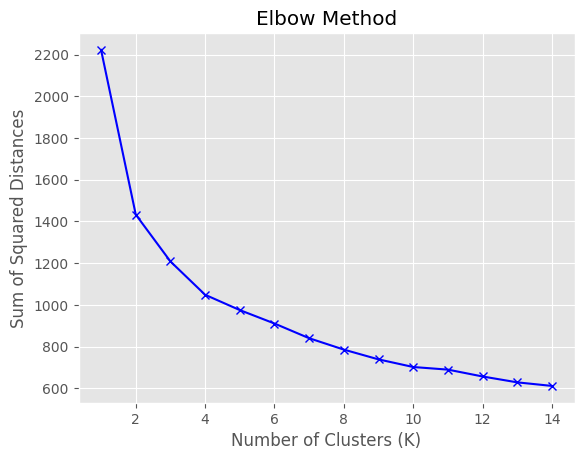

In [51]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Prepare the feature matrix
features = df[['rcc', 'wcc', 'hc', 'hg', 'ferr', 'bmi', 'ssf', 'pcBfat', 'lbm', 'ht', 'wt']]

# Standardize the feature matrix
scaler = StandardScaler()
Xss = scaler.fit_transform(features)

# Perform K-means clustering with different values of K
Sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Xss)
    Sum_of_squared_distances.append(km.inertia_)

# Plot the elbow curve
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

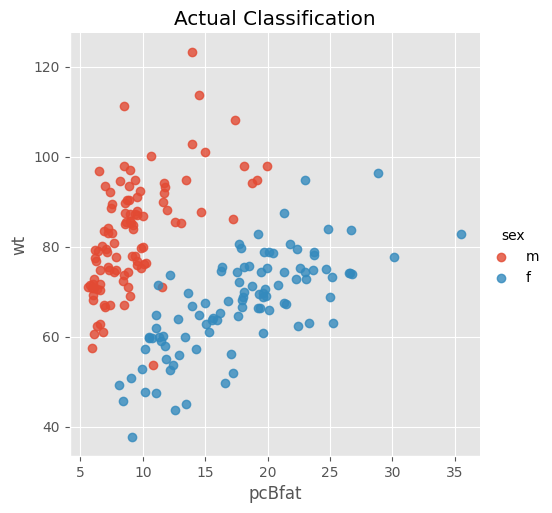

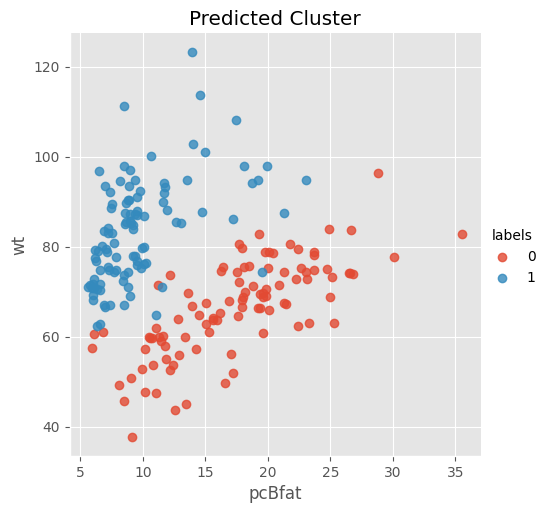

In [50]:
# ANSWER

#length x groove_length
df_labels = df
df_labels['labels'] = labels_2

#length x groove_length
ais_labels = df
ais_labels['labels'] = labels_2

sns.lmplot(x='pcBfat', y='wt', data=df_labels, hue='sex',
           hue_order=['m', 'f'], fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='pcBfat', y='wt', data=df_labels, hue='labels', fit_reg=False)
plt.title('Predicted Cluster')
plt.show();

### 7. Plot `wt` vs. `pcBfat` using the clusters from each model.

- Plot wt, pcBfat using hue sex
- Plot wt, pcBfat using hue label

Each time, compare to the actual species classification.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 7.93826923 74.80961538]
 [11.9698     93.252     ]
 [21.04362069 72.80862069]
 [11.82595238 56.57142857]]


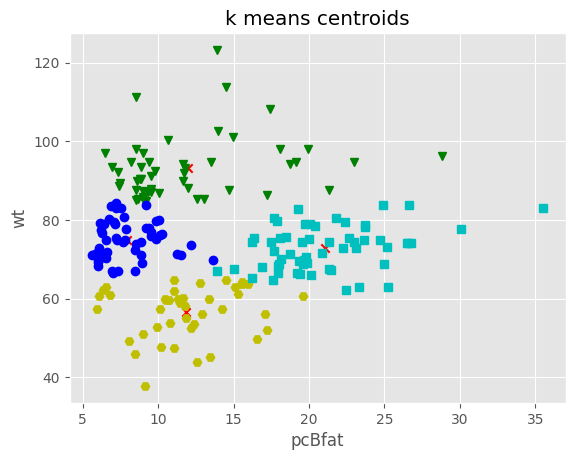

In [53]:
# ANSWER

x1 = np.array(df['pcBfat'])
x2 = np.array(df['wt'])

# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'c', 'y']
markers = ['o', 'v', 's', 'H']

# KMeans algorithm
K = 4
kmeans_model = KMeans(n_clusters=K).fit(X)

print(kmeans_model.cluster_centers_)
centers = np.array(kmeans_model.cluster_centers_)

plt.plot()
plt.title('k means centroids')
plt.xlabel('pcBfat')
plt.ylabel('wt')

for i, l in enumerate(kmeans_model.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l],ls='None')

plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


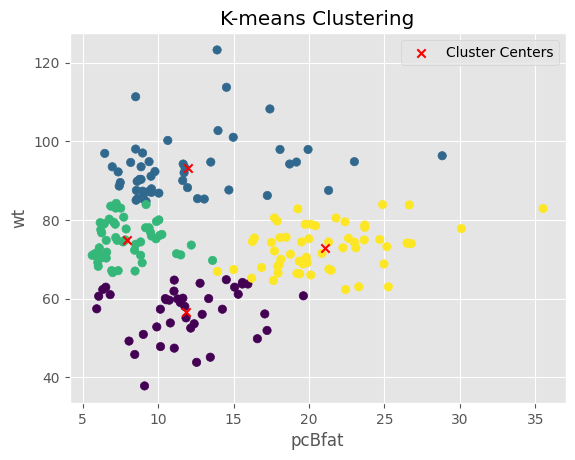

In [54]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

x1 = df['pcBfat']
x2 = df['wt']

X = np.column_stack((x1, x2))

k = 4
kmeans_model = KMeans(n_clusters=k).fit(X)
cluster_centers = kmeans_model.cluster_centers_
labels = kmeans_model.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', label='Cluster Centers')
plt.title('K-means Clustering')
plt.xlabel('pcBfat')
plt.ylabel('wt')
plt.legend()
plt.show()



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



